## Predicta 1.0: Classify the Weather
#### Using Data Science to Classify Weather and Make it Easy to Understand

In [75]:
#Importing packages 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


In [76]:
#Loading the data
daily_data = pd.read_csv('daily_data.csv')

### Data understanding and preprocessing 

In [77]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   day_id                    2893 non-null   object 
 1   city_id                   2893 non-null   object 
 2   temperature_celsius       2893 non-null   float64
 3   condition_text            479 non-null    object 
 4   wind_kph                  2893 non-null   float64
 5   wind_degree               2893 non-null   int64  
 6   pressure_mb               2893 non-null   float64
 7   precip_mm                 2893 non-null   float64
 8   humidity                  2893 non-null   int64  
 9   cloud                     2893 non-null   int64  
 10  feels_like_celsius        2893 non-null   float64
 11  visibility_km             2893 non-null   float64
 12  uv_index                  2893 non-null   float64
 13  gust_kph                  2893 non-null   float64
 14  air_qual

In [78]:
daily_data.isnull().sum()

day_id                         0
city_id                        0
temperature_celsius            0
condition_text              2414
wind_kph                       0
wind_degree                    0
pressure_mb                    0
precip_mm                      0
humidity                       0
cloud                          0
feels_like_celsius             0
visibility_km                  0
uv_index                       0
gust_kph                       0
air_quality_us-epa-index       0
sunrise                        0
sunset                         0
dtype: int64

In [79]:
daily_data.duplicated().sum()

0

In [80]:
# Separate rows with missing 'condition_text'
missing_condition_idx = daily_data[daily_data['condition_text'].isnull()].index
missing_data = daily_data.loc[missing_condition_idx]

In [81]:
# Preprocess the remaining data (without missing 'condition_text')
data_with_condition = daily_data.dropna(subset=['condition_text'])

In [82]:
#handling missing values - no missing values 

numeric_cols = data_with_condition.select_dtypes(include=np.number).columns
for col in numeric_cols:
    data_with_condition [col].fillna(data_with_condition[col].mean(), inplace=True)
    

C:\Users\nadha\AppData\Local\Temp\ipykernel_14920\467418582.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_condition [col].fillna(data_with_condition[col].mean(), inplace=True)


In [83]:
# Encode 'condition_text' column
label_encoder = LabelEncoder()
data_with_condition['condition_text'] = label_encoder.fit_transform(data_with_condition['condition_text'])

C:\Users\nadha\AppData\Local\Temp\ipykernel_14920\2545618779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_condition['condition_text'] = label_encoder.fit_transform(data_with_condition['condition_text'])


In [84]:
# Encoding categorical variables
label_encoders = {}
for column in data_with_condition.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_with_condition[column] = le.fit_transform(data_with_condition[column])
    label_encoders[column] = le
    


C:\Users\nadha\AppData\Local\Temp\ipykernel_14920\4001889164.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_condition[column] = le.fit_transform(data_with_condition[column])
C:\Users\nadha\AppData\Local\Temp\ipykernel_14920\4001889164.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_condition[column] = le.fit_transform(data_with_condition[column])
C:\Users\nadha\AppData\Local\Temp\ipykernel_14920\4001889164.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

### Visual EDA

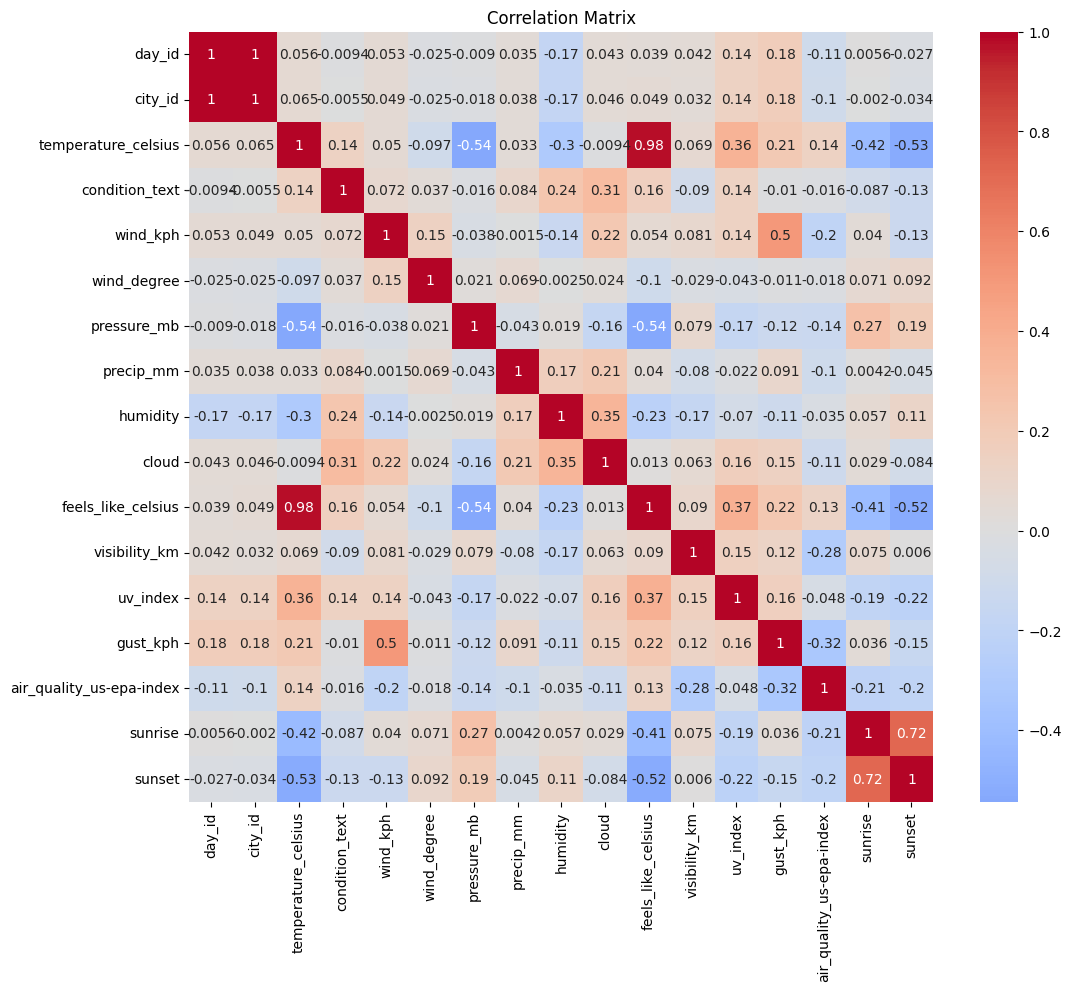

In [85]:
numeric_data = data_with_condition.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [86]:
categorical_features = data_with_condition.select_dtypes(include=int).columns.to_list()
continuous_features = data_with_condition.select_dtypes(include=float).columns.to_list()

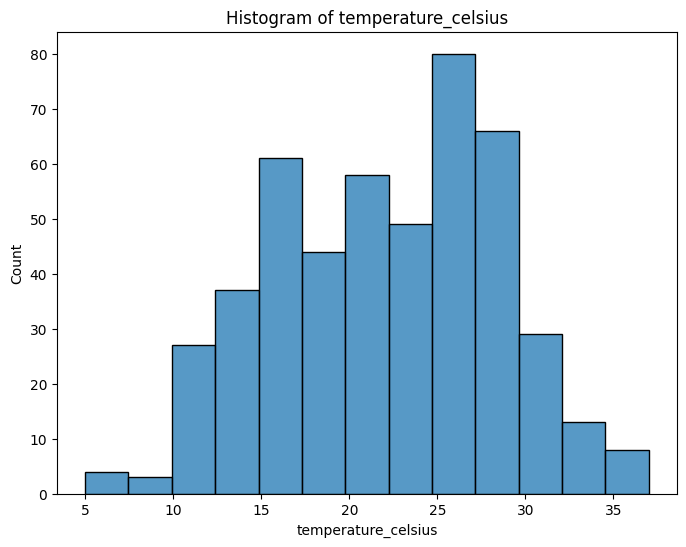

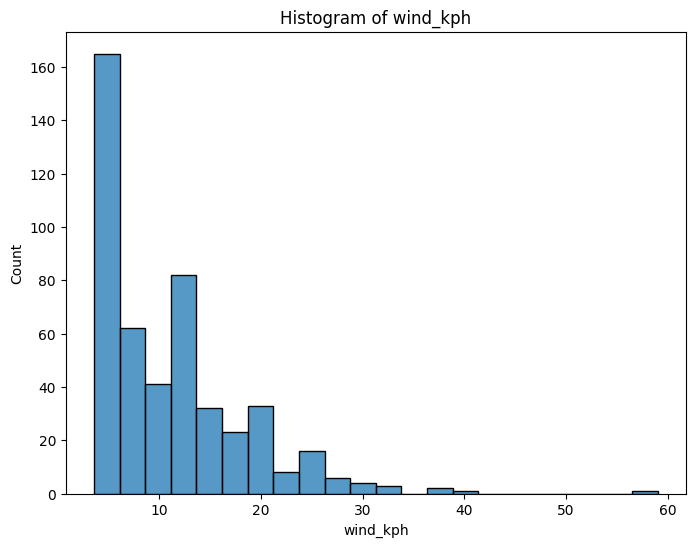

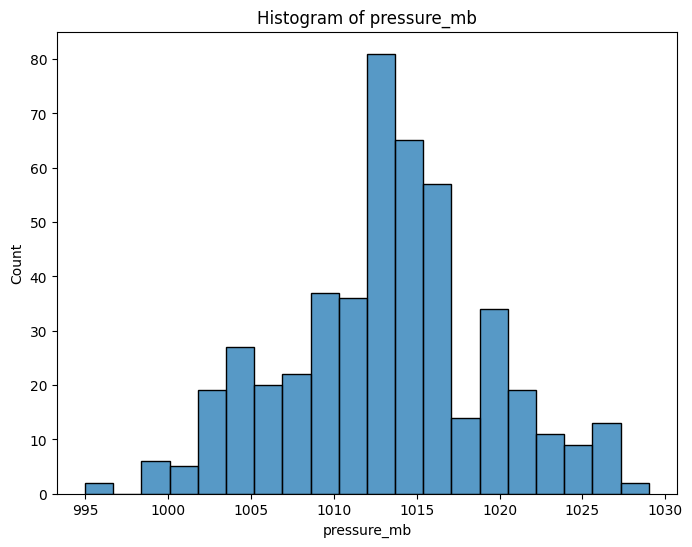

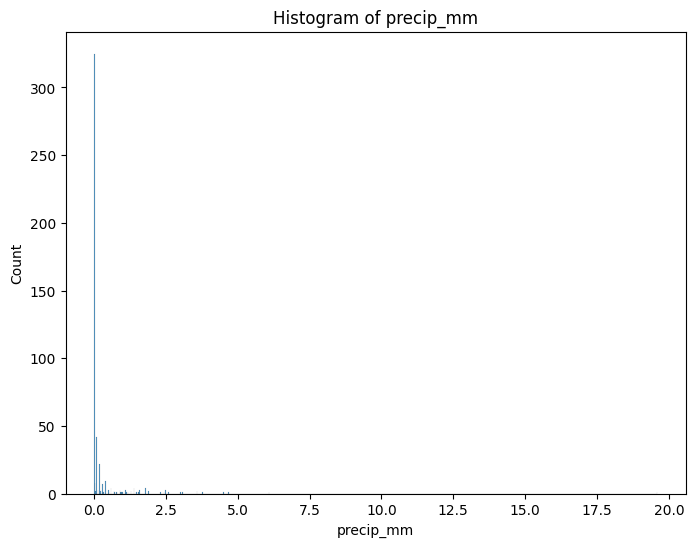

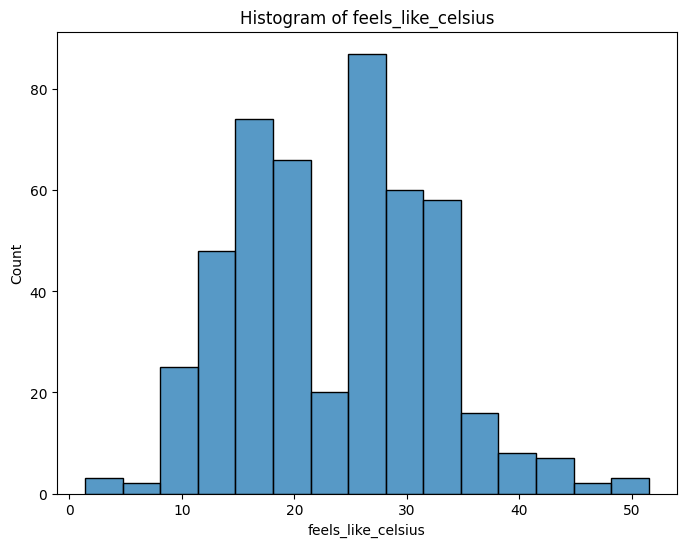

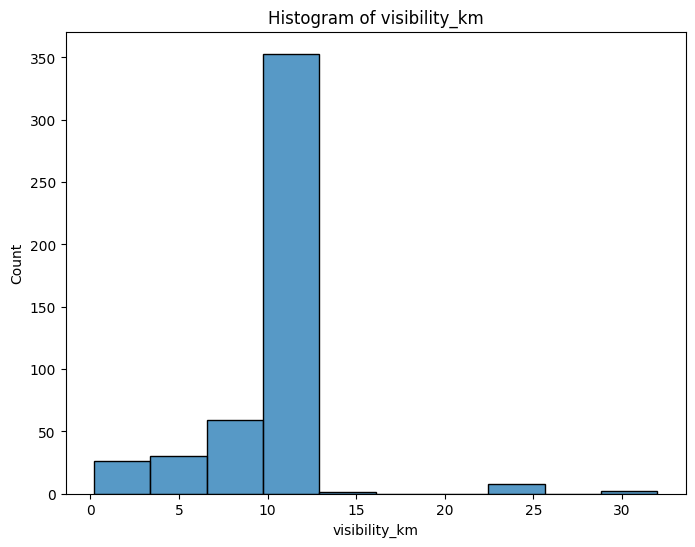

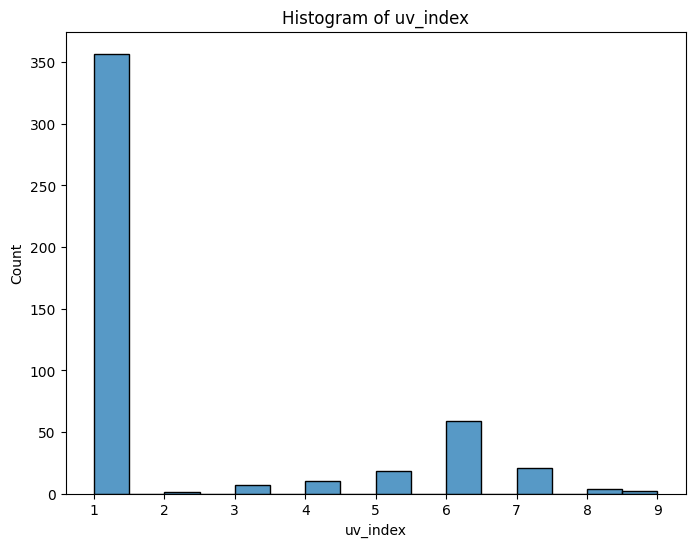

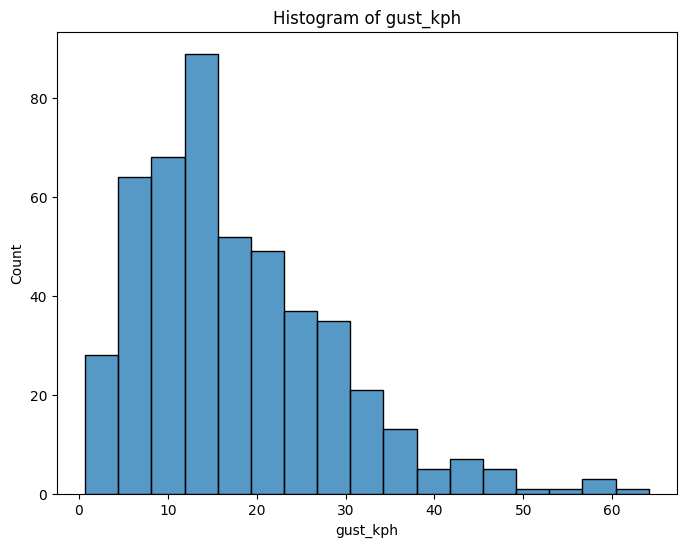

In [87]:
for i, col in enumerate(data_with_condition[continuous_features].columns):
    plt.figure(figsize=(8,6))
    sns.histplot(data=data_with_condition[continuous_features], x=col)
    plt.title(f'Histogram of {col}')
    plt.show()

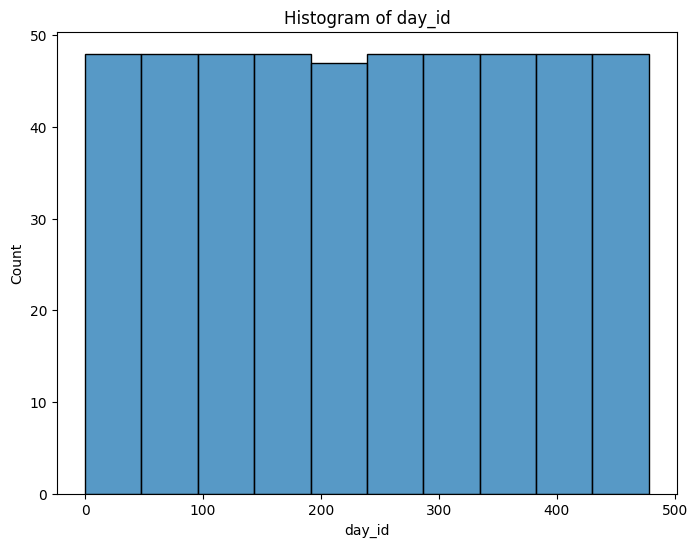

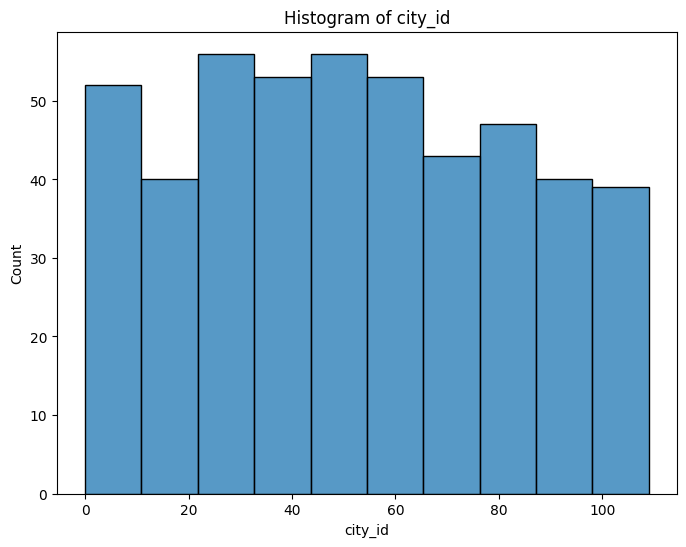

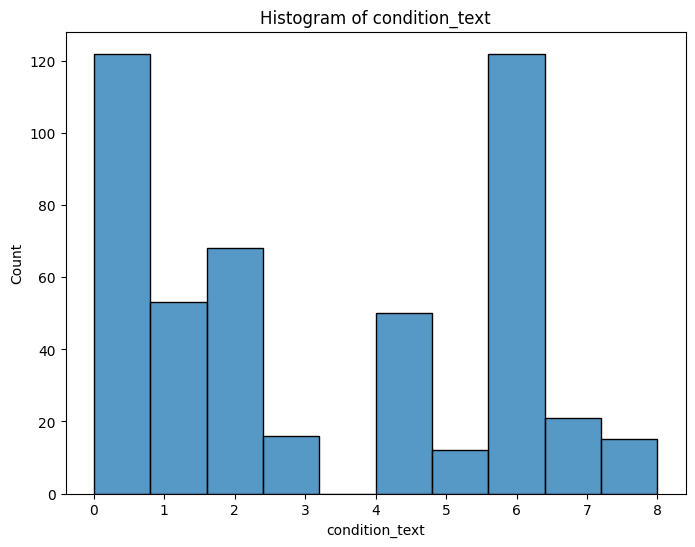

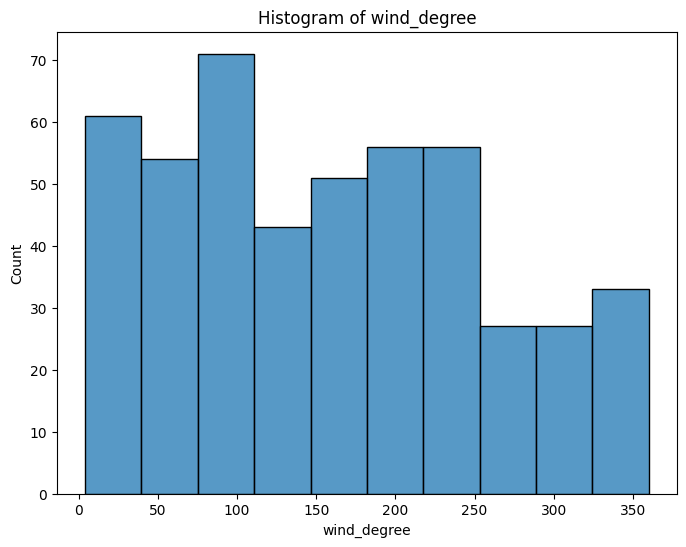

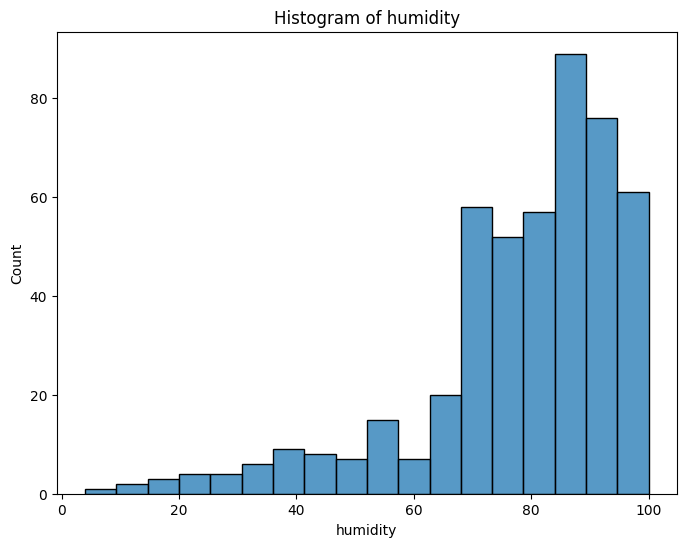

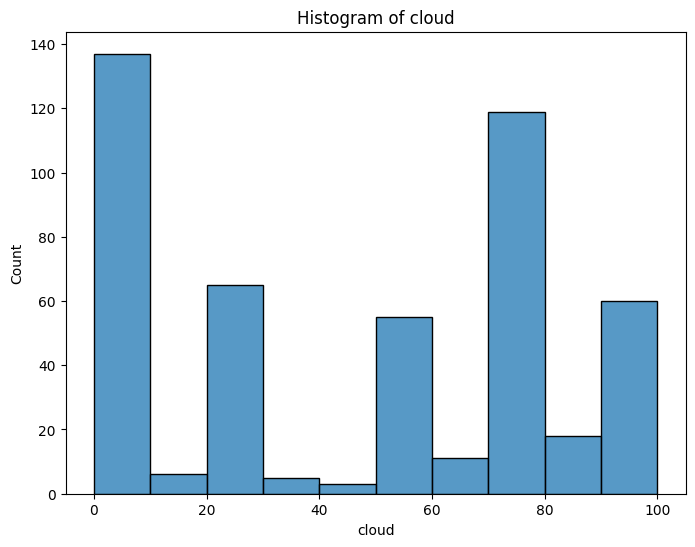

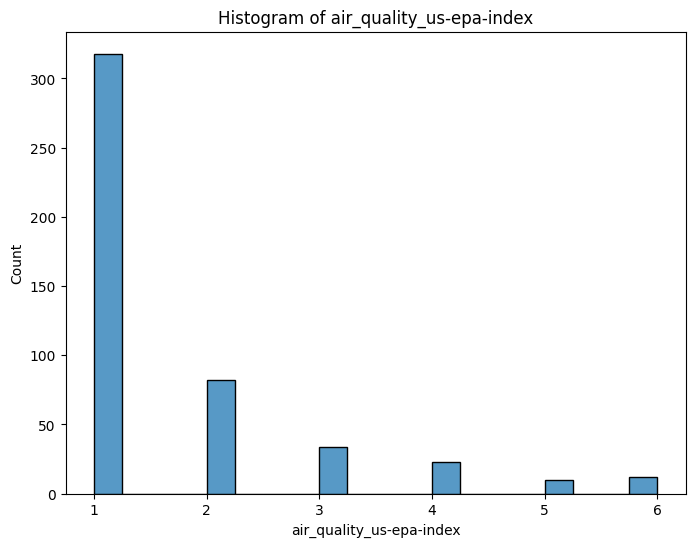

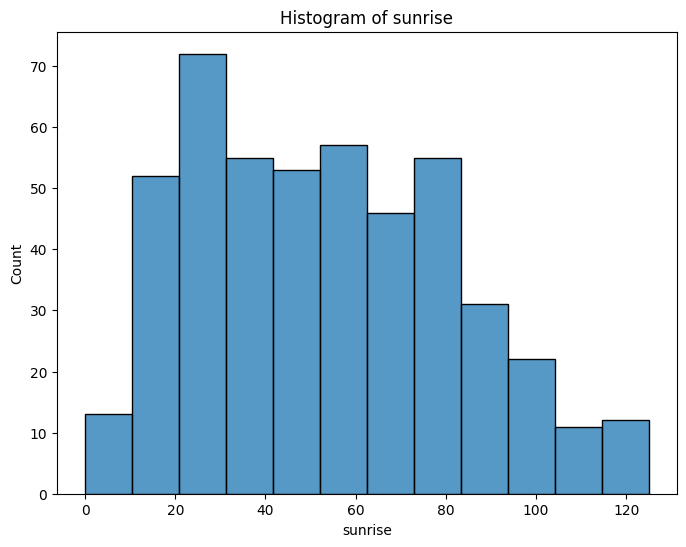

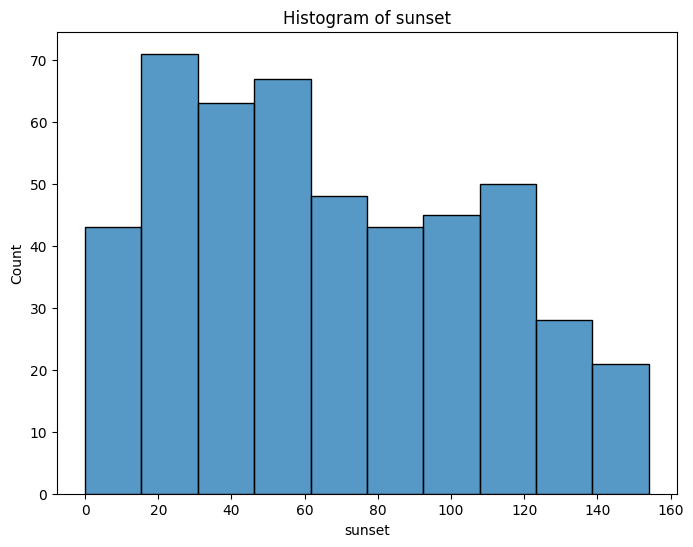

In [88]:
for i, col in enumerate(data_with_condition[categorical_features].columns):
    plt.figure(figsize=(8,6))
    sns.histplot(data=data_with_condition[categorical_features], x=col)
    plt.title(f'Histogram of {col}')
    plt.show()

#### Feature Engineering 

In [89]:
#creating new features 
data_with_condition['sqrt_cloud'] = np.sqrt(data_with_condition['cloud'])
data_with_condition['sqrd_cloud'] = data_with_condition['cloud']**2
data_with_condition['log_cloud'] = np.log1p(data_with_condition['cloud'])

#creating new features 
missing_data['sqrt_cloud'] = np.sqrt(missing_data['cloud'])
missing_data['sqrd_cloud'] = missing_data['cloud']**2
missing_data['log_cloud'] = np.log1p(missing_data['cloud'])

C:\Users\nadha\AppData\Local\Temp\ipykernel_14920\439880676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_condition['sqrt_cloud'] = np.sqrt(data_with_condition['cloud'])
C:\Users\nadha\AppData\Local\Temp\ipykernel_14920\439880676.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_condition['sqrd_cloud'] = data_with_condition['cloud']**2
C:\Users\nadha\AppData\Local\Temp\ipykernel_14920\439880676.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [90]:
data_with_condition['temp_humidity_interaction'] = data_with_condition['temperature_celsius'] - (0.4 * (1 - data_with_condition['humidity'] / 100) * (data_with_condition['temperature_celsius'] - 14))
missing_data['temp_humidity_interaction'] = missing_data['temperature_celsius'] - (0.4 * (1 - missing_data['humidity'] / 100) * (missing_data['temperature_celsius'] - 14))

C:\Users\nadha\AppData\Local\Temp\ipykernel_14920\1223135853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_condition['temp_humidity_interaction'] = data_with_condition['temperature_celsius'] - (0.4 * (1 - data_with_condition['humidity'] / 100) * (data_with_condition['temperature_celsius'] - 14))


In [91]:
data_with_condition['Clear_Sky'] = data_with_condition['visibility_km'] / ((data_with_condition['uv_index'] *data_with_condition['cloud'] * data_with_condition['cloud'])+1)
missing_data['Clear_Sky'] = missing_data['visibility_km'] / ((missing_data['uv_index'] *missing_data['cloud'] * missing_data['cloud'])+1)

C:\Users\nadha\AppData\Local\Temp\ipykernel_14920\3656997831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_condition['Clear_Sky'] = data_with_condition['visibility_km'] / ((data_with_condition['uv_index'] *data_with_condition['cloud'] * data_with_condition['cloud'])+1)


### Model selection and Training

In [92]:
# Extract features and target
X = data_with_condition.drop(['condition_text', 'day_id'], axis=1)
y = data_with_condition['condition_text']


In [93]:
# MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0, 1))  # Scale between 0 and 1
X_scaled = scaler.fit_transform(X)

In [94]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Model 1 - RandomForestClassifier

In [97]:
#GridSearch


param_grid = {
    'n_estimators': [100,200,300,400],
    'max_depth': [10,20,30,40,None]
}

model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Test Score: {test_score}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'max_depth': 10, 'n_estimators': 300}
Best Cross-Validation Score: 0.720745044429255
Test Score: 0.7604166666666666


In [98]:
# Predict on the test set
y_pred = best_model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.69      0.75      0.72        12
           2       0.70      0.58      0.64        12
           3       0.00      0.00      0.00         5
           4       0.88      0.88      0.88         8
           5       0.00      0.00      0.00         4
           6       0.68      1.00      0.81        26
           7       0.67      0.40      0.50         5
           8       0.00      0.00      0.00         2

    accuracy                           0.76        96
   macro avg       0.51      0.51      0.50        96
weighted avg       0.70      0.76      0.72        96

Confusion Matrix:
[[22  0  0  0  0  0  0  0  0]
 [ 0  9  1  0  0  0  2  0  0]
 [ 0  2  7  0  0  0  2  1  0]
 [ 0  0  0  0  1  0  4  0  0]
 [ 0  0  1  0  7  0  0  0  0]
 [ 0  2  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0 26  0  0]
 [ 0  0  1  0  0  1  1  2  0]
 [ 0  0  0  1 

C:\Users\nadha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nadha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nadha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

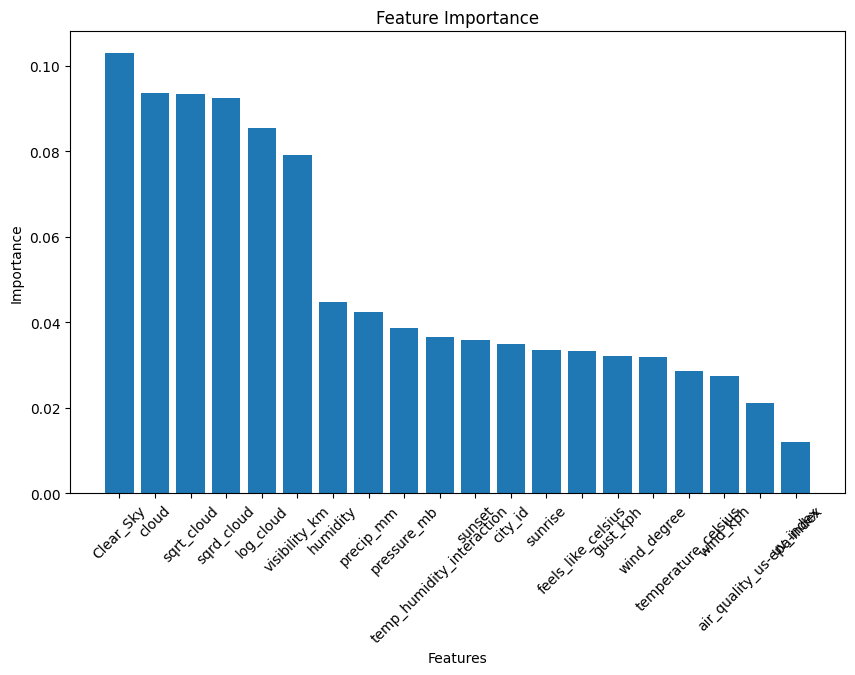

In [99]:
# Feature importance
feature_importances = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()



#### Model 2 - Artificial Neural Network

Epoch 1/100
10/10 [==============================] - 2s 43ms/step - loss: 2.1559 - accuracy: 0.1895 - val_loss: 2.1376 - val_accuracy: 0.2468
Epoch 2/100
10/10 [==============================] - 0s 12ms/step - loss: 2.0742 - accuracy: 0.3007 - val_loss: 2.0597 - val_accuracy: 0.2727
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 1.9435 - accuracy: 0.3497 - val_loss: 1.9630 - val_accuracy: 0.3377
Epoch 4/100
10/10 [==============================] - 0s 12ms/step - loss: 1.8813 - accuracy: 0.3301 - val_loss: 1.8801 - val_accuracy: 0.3766
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 1.7667 - accuracy: 0.3987 - val_loss: 1.7997 - val_accuracy: 0.3766
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 1.6892 - accuracy: 0.4183 - val_loss: 1.7217 - val_accuracy: 0.3766
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 1.6128 - accuracy: 0.4542 - val_loss: 1.6673 - val_accuracy: 0.3896
Epoch 

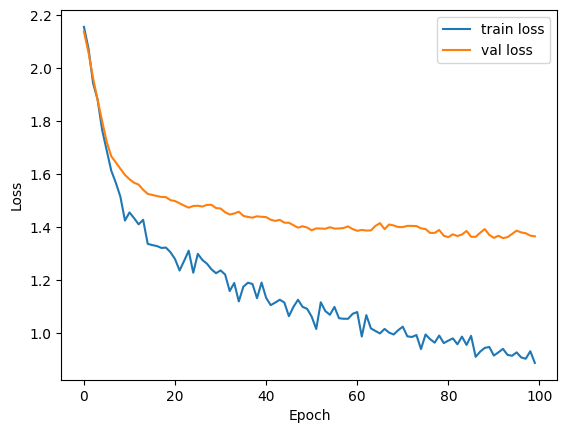

3/3 [==============================] - 0s 8ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        22
           1       0.55      0.50      0.52        12
           2       0.39      0.58      0.47        12
           3       0.00      0.00      0.00         5
           4       0.78      0.88      0.82         8
           5       0.00      0.00      0.00         4
           6       0.51      0.69      0.59        26
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         2

    accuracy                           0.60        96
   macro avg       0.34      0.40      0.37        96
weighted avg       0.52      0.60      0.56        96

Confusion Matrix:
[[20  0  0  0  0  0  2  0  0]
 [ 0  6  2  0  0  0  4  0  0]
 [ 0  1  7  0  1  0  3  0  0]
 [ 0  0  1  0  1  0  3  0  0]
 [ 0  0  0  0  7  0  1  0  0]
 [ 0  1  2  0  0  0  1  0  0]
 [ 3  3  2  0  0  0 18 

C:\Users\nadha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nadha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nadha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [100]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

# Convert target to categorical
y_categorical = to_categorical(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# Build the ANN model
model_2 = Sequential()
model_2.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(y_categorical.shape[1], activation='softmax'))

# Compile the model
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model_2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
scores = model_2.evaluate(X_test, y_test)
print(f"Test Accuracy: {scores[1]}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict on the test set
y_pred = model_2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true_classes, y_pred_classes))

After evaluating the performance of both models, we used the RandomForestClassifier for this classification task. Its higher accuracy and robustness make it a more reliable choice compared to the ANN for this specific application.

#### Predictions on missing data 

In [101]:
#handling missing values
numeric_cols = missing_data.select_dtypes(include=np.number).columns
for col in numeric_cols:
    missing_data[col].fillna(missing_data[col].mean(), inplace=True)

In [102]:
# Encoding categorical variables
label_encoders = {}
for column in missing_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    missing_data[column] = le.fit_transform(missing_data[column])
    label_encoders[column] = le

In [103]:
#selecting features
missing_data_features = missing_data.drop(['condition_text', 'day_id'], axis=1)

In [104]:
#scaling missing_data
X_missing_scaled = scaler.transform(missing_data_features)

# Predict missing values
missing_predictions = best_model.predict(X_missing_scaled)

In [105]:
# Fill in the missing values
daily_data.loc[missing_condition_idx, 'condition_text'] = label_encoder.inverse_transform(missing_predictions)


In [106]:
# Create the submission file
submission = daily_data[['day_id', 'condition_text']]
submission.to_csv('submission.csv', index=False)
submission

,day_id,condition_text
0,D0001,Partly Cloudy
1,D0002,Partly Cloudy
2,D0003,Light Rain with Thunder
3,D0004,Clear and Sunny
4,D0005,Clear and Sunny
...,...,...
2888,D2889,Clear and Sunny
2889,D2890,Clear and Sunny
2890,D2891,Clear and Sunny
2891,D2892,Clear and Sunny
